# Overview

## What to Predict

- Stage 1 - You should submit predicted probabilities for every possible matchup in the past 5 NCAA® tournaments (seasons 2015-2019).
- Stage 2 - You should submit predicted probabilities for every possible matchup before the 2020 tournament begins.

Refer to the [Timeline page](https://www.kaggle.com/c/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/overview/timeline) for specific dates. In both stages, the sample submission will tell you which games to predict.

# Import Packages

In [12]:
import os

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20, 6


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Download

In [2]:
# Downloading the Data using Kaggle API
!kaggle competitions download -c google-cloud-ncaa-march-madness-2020-division-1-mens-tournament

Traceback (most recent call last):
  File "d:\programming\anaconda\envs\kaggle\lib\runpy.py", line 193, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\programming\anaconda\envs\kaggle\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "D:\Programming\Anaconda\envs\kaggle\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "d:\programming\anaconda\envs\kaggle\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "d:\programming\anaconda\envs\kaggle\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 147, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\hyt03\.kaggle. Or use the environment method.


# Data Import

In [3]:
def get_file_list(datapath):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(datapath)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(datapath, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + get_file_list(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [4]:
main_path = 'D:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2020-NCAAM\\'
sub_folders = os.listdir(main_path)
datapath = main_path + sub_folders[0] + '\\'

# Get the list of all files in directory tree at given path
data_list = get_file_list(datapath)

data_list

['D:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2020-NCAAM\\Data Section 1 - The Basics\\MNCAATourneyCompactResults.csv',
 'D:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2020-NCAAM\\Data Section 1 - The Basics\\MNCAATourneySeeds.csv',
 'D:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2020-NCAAM\\Data Section 1 - The Basics\\MRegularSeasonCompactResults.csv',
 'D:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2020-NCAAM\\Data Section 1 - The Basics\\MSampleSubmissionStage1_2020.csv',
 'D:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NCAA® ML Competition 2020-NCAAM\\Data Section 1 - The Basics\\MSeasons.csv',
 'D:\\OneDrive - Georgia State University\\Data Science\\Competition\\Data\\Google Cloud & NC

In [44]:
tourney_compact_result_M = pd.read_csv(datapath + 'MNCAATourneyCompactResults.csv')
tourney_seed_M = pd.read_csv(datapath + 'MNCAATourneySeeds.csv')
regular_compact_result_M = pd.read_csv(datapath + 'MRegularSeasonCompactResults.csv')
season_M = pd.read_csv(datapath + 'MSeasons.csv')
teams_M = pd.read_csv(datapath + 'MTeams.csv')

submission_file = pd.read_csv(datapath + 'MSampleSubmissionStage1_2020.csv')

# Data Exploratory Analysis

    - for each data we will:
        - handle missing values
        - find-out meaningful information that can potentially affect the result of the game

## Section 1 - The Basics

### Tourney Compact Result

- concatenate with regular season data first.
- per team
    - score trend throughout a season, throughout years. 
    - score trend depend on cities.

In [45]:
tourney_compact_result_M.info()
tourney_compact_result_M

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   2251 non-null   int64 
 1   DayNum   2251 non-null   int64 
 2   WTeamID  2251 non-null   int64 
 3   WScore   2251 non-null   int64 
 4   LTeamID  2251 non-null   int64 
 5   LScore   2251 non-null   int64 
 6   WLoc     2251 non-null   object
 7   NumOT    2251 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 140.8+ KB


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71,N,1
2247,2019,146,1277,68,1181,67,N,0
2248,2019,152,1403,61,1277,51,N,0
2249,2019,152,1438,63,1120,62,N,0


In [36]:
tourney_compact_result_M.groupby(['Season', 'WTeamID']).mean()

,Season,DayNum,WScore,LTeamID,LScore,NumOT,score_diff,chronological
WTeamID,,,,,,,,
1104,1994.578947,137.421053,79.684211,1313.894737,70.368421,0.052632,9.315789,2132.000000
1107,2014.000000,134.000000,71.000000,1291.000000,64.000000,0.000000,7.000000,2148.000000
1112,2001.537037,139.925926,81.740741,1302.851852,65.851852,0.074074,15.888889,2141.462963
1113,2002.000000,136.500000,74.666667,1298.833333,64.833333,0.000000,9.833333,2138.500000
1114,2001.000000,136.500000,87.500000,1334.000000,83.000000,1.000000,4.500000,2137.500000
...,...,...,...,...,...,...,...,...
1458,2009.000000,139.029412,70.117647,1279.147059,60.705882,0.058824,9.411765,2148.029412
1459,2019.000000,136.000000,84.000000,1371.000000,68.000000,0.000000,16.000000,2155.000000
1461,1992.000000,136.666667,71.666667,1355.333333,64.666667,0.000000,7.000000,2128.666667


In [25]:
tourney_compact_result_M['score_diff'] = tourney_compact_result_M['WScore'] - tourney_compact_result_M['LScore']
tourney_compact_result_M['chronological'] = tourney_compact_result_M['Season'] + tourney_compact_result_M['DayNum']

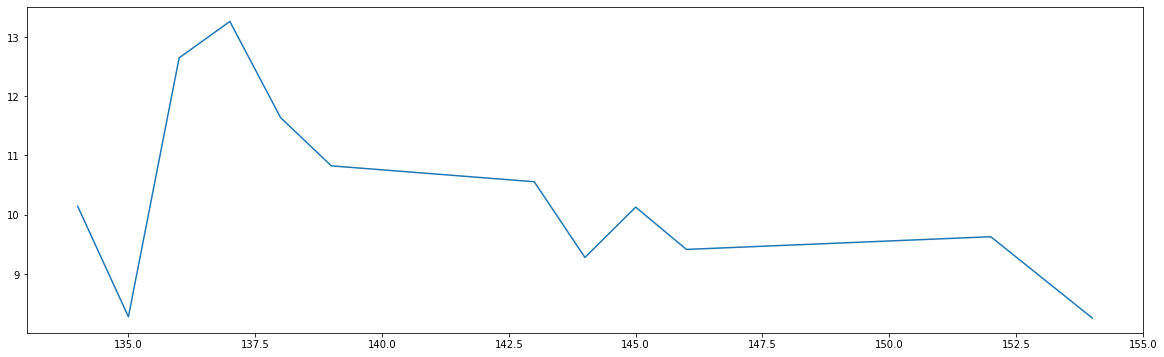

In [34]:
chronological = tourney_compact_result_M.groupby('DayNum').mean()
plt.plot(chronological['score_diff'])

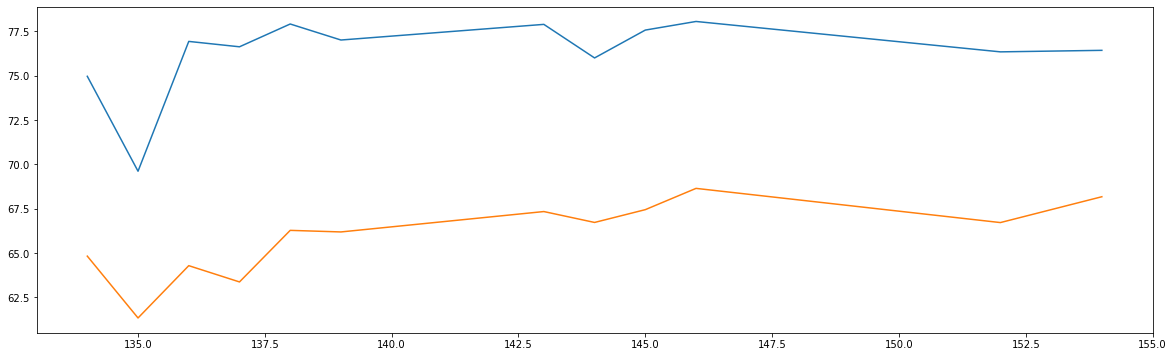

In [35]:
plt.plot(chronological['WScore'])
plt.plot(chronological['LScore'])

In [53]:
tourney_seed_M.info()
tourney_seed_M

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  2286 non-null   int64 
 1   Seed    2286 non-null   object
 2   TeamID  2286 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 53.7+ KB


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2281,2019,Z12,1332
2282,2019,Z13,1414
2283,2019,Z14,1330
2284,2019,Z15,1159


In [58]:
regular_compact_result_M.info()
regular_compact_result_M

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161552 entries, 0 to 161551
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   161552 non-null  int64 
 1   DayNum   161552 non-null  int64 
 2   WTeamID  161552 non-null  int64 
 3   WScore   161552 non-null  int64 
 4   LTeamID  161552 non-null  int64 
 5   LScore   161552 non-null  int64 
 6   WLoc     161552 non-null  object
 7   NumOT    161552 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 9.9+ MB


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
161547,2019,132,1153,69,1222,57,N,0
161548,2019,132,1209,73,1426,64,N,0
161549,2019,132,1277,65,1276,60,N,0
161550,2019,132,1387,55,1382,53,N,0


In [56]:
season_M.info()
season_M

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   36 non-null     int64 
 1   DayZero  36 non-null     object
 2   RegionW  36 non-null     object
 3   RegionX  36 non-null     object
 4   RegionY  36 non-null     object
 5   RegionZ  36 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.8+ KB


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast
5,1990,10/30/1989,East,Midwest,Southeast,West
6,1991,10/29/1990,East,Southeast,Midwest,West
7,1992,11/4/1991,East,West,Midwest,Southeast
8,1993,11/2/1992,East,Midwest,Southeast,West
9,1994,11/1/1993,East,Southeast,Midwest,West


In [57]:
teams_M.info()
teams_M

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TeamID         367 non-null    int64 
 1   TeamName       367 non-null    object
 2   FirstD1Season  367 non-null    int64 
 3   LastD1Season   367 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.6+ KB


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2020
1,1102,Air Force,1985,2020
2,1103,Akron,1985,2020
3,1104,Alabama,1985,2020
4,1105,Alabama A&M,2000,2020
...,...,...,...,...
362,1463,Yale,1985,2020
363,1464,Youngstown St,1985,2020
364,1465,Cal Baptist,2019,2020
365,1466,North Alabama,2019,2020


# Feature Engineering

- desired output:
    - index: each team id
    - columns: opponent
    - result: Result (W or L)
    - Score:
    - Opp_Score:
    - Season:
    - DayNum:
    - CityID:

# Reference
- Primary: [google-cloud-ncaa-march-madness-2020-division-1-mens-tournament](https://www.kaggle.com/c/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament)
- Secondary:

## Section 0 - Submission File

In [6]:
submission_file

,ID,Pred
0,2015_1107_1112,0.5
1,2015_1107_1116,0.5
2,2015_1107_1124,0.5
3,2015_1107_1125,0.5
4,2015_1107_1129,0.5
...,...,...
11385,2019_1449_1459,0.5
11386,2019_1449_1463,0.5
11387,2019_1458_1459,0.5
11388,2019_1458_1463,0.5


In [70]:
# Spliting ID into 3 different columns
submission_file['Season'] = submission_file['ID'].apply(lambda x: x.split("_")[0])
submission_file['lower_team'] = submission_file['ID'].apply(lambda x: x.split("_")[1])
submission_file['higher_team'] = submission_file['ID'].apply(lambda x: x.split("_")[2])

# Reorder the columns to move the target variable to the end
cols = ["ID", "Season", "lower_team", "higher_team", "Pred"]

# apply the corrected column order to the data frame
submission_file = submission_file[cols]
submission_file

,ID,Season,lower_team,higher_team,Pred
0,2015_1107_1112,2015,1107,1112,0.5
1,2015_1107_1116,2015,1107,1116,0.5
2,2015_1107_1124,2015,1107,1124,0.5
3,2015_1107_1125,2015,1107,1125,0.5
4,2015_1107_1129,2015,1107,1129,0.5
...,...,...,...,...,...
11385,2019_1449_1459,2019,1449,1459,0.5
11386,2019_1449_1463,2019,1449,1463,0.5
11387,2019_1458_1459,2019,1458,1459,0.5
11388,2019_1458_1463,2019,1458,1463,0.5
